# Time Series Analysis of Household Electricity Consumption

In [2]:
import pandas as pd
import matplotlib as plt

## 1. Loading and Preparing the Data

In [3]:
df = pd.read_csv('household_power_consumption.txt', sep=';', 
                 parse_dates={'datetime': ['Date', 'Time']},
                 low_memory=False, na_values=['?'])

C:\Users\DuaaHilal\AppData\Local\Temp\ipykernel_17744\1828847462.py:1: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df = pd.read_csv('household_power_consumption.txt', sep=';',
C:\Users\DuaaHilal\AppData\Local\Temp\ipykernel_17744\1828847462.py:1: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df = pd.read_csv('household_power_consumption.txt', sep=';',


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 8 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   datetime               datetime64[ns]
 1   Global_active_power    float64       
 2   Global_reactive_power  float64       
 3   Voltage                float64       
 4   Global_intensity       float64       
 5   Sub_metering_1         float64       
 6   Sub_metering_2         float64       
 7   Sub_metering_3         float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 126.7 MB
None


In [5]:
print(df.head())

             datetime  Global_active_power  Global_reactive_power  Voltage  \
0 2006-12-16 17:24:00                4.216                  0.418   234.84   
1 2006-12-16 17:25:00                5.360                  0.436   233.63   
2 2006-12-16 17:26:00                5.374                  0.498   233.29   
3 2006-12-16 17:27:00                5.388                  0.502   233.74   
4 2006-12-16 17:28:00                3.666                  0.528   235.68   

   Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  
0              18.4             0.0             1.0            17.0  
1              23.0             0.0             1.0            16.0  
2              23.0             0.0             2.0            17.0  
3              23.0             0.0             1.0            17.0  
4              15.8             0.0             1.0            17.0  


## 2. Time-Based Slicing

In [8]:
year2007 = df.loc[2007]
year2007

datetime                 2006-12-18 02:51:00
Global_active_power                    0.304
Global_reactive_power                  0.148
Voltage                               247.61
Global_intensity                         1.4
Sub_metering_1                           0.0
Sub_metering_2                           0.0
Sub_metering_3                           0.0
Name: 2007, dtype: object

In [9]:
df['datetime'] = pd.to_datetime(df['datetime'], format='%d/%m/%Y %H:%M:%S')
df.set_index('datetime', inplace=True)

In [11]:
year2007 = df.loc['2007']
year2007

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2007-01-01 00:00:00,2.580,0.136,241.97,10.6,0.0,0.0,0.0
2007-01-01 00:01:00,2.552,0.100,241.75,10.4,0.0,0.0,0.0
2007-01-01 00:02:00,2.550,0.100,241.64,10.4,0.0,0.0,0.0
2007-01-01 00:03:00,2.550,0.100,241.71,10.4,0.0,0.0,0.0
2007-01-01 00:04:00,2.554,0.100,241.98,10.4,0.0,0.0,0.0
...,...,...,...,...,...,...,...
2007-12-31 23:55:00,1.746,0.204,242.41,7.2,0.0,0.0,18.0
2007-12-31 23:56:00,1.732,0.210,242.42,7.2,0.0,0.0,18.0
2007-12-31 23:57:00,1.732,0.210,242.50,7.2,0.0,0.0,18.0


In [12]:
q12007 = df.loc['2007-01-01':'2007-03-31']
q12007

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2007-01-01 00:00:00,2.580,0.136,241.97,10.6,0.0,0.0,0.0
2007-01-01 00:01:00,2.552,0.100,241.75,10.4,0.0,0.0,0.0
2007-01-01 00:02:00,2.550,0.100,241.64,10.4,0.0,0.0,0.0
2007-01-01 00:03:00,2.550,0.100,241.71,10.4,0.0,0.0,0.0
2007-01-01 00:04:00,2.554,0.100,241.98,10.4,0.0,0.0,0.0
...,...,...,...,...,...,...,...
2007-03-31 23:55:00,3.466,0.232,242.26,14.2,1.0,1.0,18.0
2007-03-31 23:56:00,3.438,0.224,242.08,14.2,2.0,1.0,18.0
2007-03-31 23:57:00,3.324,0.224,240.42,13.8,1.0,2.0,18.0


In [13]:
jan2008 = df.loc['2008-01']
jan2008

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2008-01-01 00:00:00,1.620,0.070,241.25,6.6,0.0,0.0,18.0
2008-01-01 00:01:00,1.626,0.072,241.74,6.6,0.0,0.0,18.0
2008-01-01 00:02:00,1.622,0.072,241.52,6.6,0.0,0.0,18.0
2008-01-01 00:03:00,1.612,0.070,240.82,6.6,0.0,0.0,18.0
2008-01-01 00:04:00,1.612,0.070,240.80,6.6,0.0,0.0,18.0
...,...,...,...,...,...,...,...
2008-01-31 23:55:00,2.202,0.080,240.48,9.2,0.0,0.0,18.0
2008-01-31 23:56:00,2.210,0.080,240.89,9.2,0.0,0.0,18.0
2008-01-31 23:57:00,2.208,0.084,240.87,9.2,0.0,0.0,18.0


## 3. Resampling for Different Time Frequencies

In [14]:
daily = df.resample('D').mean()
print("pre day" , daily)

pre day             Global_active_power  Global_reactive_power     Voltage  \
datetime                                                             
2006-12-16             3.053475               0.088187  236.243763   
2006-12-17             2.354486               0.156949  240.087028   
2006-12-18             1.530435               0.112356  241.231694   
2006-12-19             1.157079               0.104821  241.999313   
2006-12-20             1.545658               0.111804  242.308062   
...                         ...                    ...         ...   
2010-11-22             1.417733               0.098857  240.197118   
2010-11-23             1.095511               0.095451  240.575528   
2010-11-24             1.247394               0.091986  240.030965   
2010-11-25             0.993864               0.080644  241.536257   
2010-11-26             1.178230               0.095666  240.291029   

            Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  
da

In [15]:
weekly = df.resample('W').mean()
weekly

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-17,2.505248,0.142118,239.258088,10.664161,1.107298,2.577887,9.949346
2006-12-24,1.734186,0.116707,241.369734,7.341973,1.110339,2.118575,7.684759
2006-12-31,1.958376,0.144109,241.910219,8.238043,1.412681,2.245287,6.671661
2007-01-07,1.484233,0.133825,240.921636,6.262123,0.581052,1.745933,5.376290
2007-01-14,1.604954,0.157782,240.270326,6.831134,1.331481,1.884016,8.270265
...,...,...,...,...,...,...,...
2010-10-31,0.958963,0.126269,244.880781,3.991687,0.591369,0.965476,5.346825
2010-11-07,1.154565,0.134101,242.891289,4.854226,1.124107,1.547619,6.021925
2010-11-14,1.335928,0.111409,238.685010,5.674028,1.595536,1.075298,7.740476


In [16]:
monthly = df.resample('M').mean()
monthly

C:\Users\DuaaHilal\AppData\Local\Temp\ipykernel_17744\4249120837.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = df.resample('M').mean()


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-31,1.901295,0.131386,241.441125,8.029956,1.248636,2.214987,7.409558
2007-01-31,1.546034,0.132676,240.905101,6.546915,1.264237,1.775931,7.383351
2007-02-28,1.401084,0.113637,240.519390,5.914569,1.180217,1.602361,6.703557
2007-03-31,1.318627,0.114747,240.513469,5.572979,1.361343,2.346872,6.504648
2007-04-30,0.891189,0.118778,239.400026,3.825676,1.065886,0.973149,4.800339
2007-05-31,0.985862,0.115343,235.178364,4.297464,1.696617,1.615860,5.139964
2007-06-30,0.826814,0.146395,238.875530,3.603550,1.382673,1.620571,4.375907
2007-07-31,0.667367,0.127481,237.671247,2.944133,0.967265,1.252174,3.478285
2007-08-31,0.764186,0.112816,237.937241,3.312668,0.812475,1.114147,5.052714


##  Analyzing Daily Patterns

In [17]:
df['hour'] = df.index.hour
hourly = df.groupby('hour').mean()
hourly

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
hour,,,,,,,
0,0.659434,0.114974,242.401809,2.806901,0.364378,0.555392,2.966651
1,0.539325,0.104968,241.719412,2.312065,0.248958,0.397963,2.351931
2,0.480621,0.105100,242.592898,2.064921,0.145858,0.350133,2.027166
3,0.444866,0.103050,242.684657,1.917526,0.067765,0.350061,1.692080
4,0.443847,0.099586,242.427262,1.911879,0.047142,0.334048,1.866275
5,0.453674,0.096942,242.094522,1.949221,0.035703,0.315693,2.135749
6,0.791600,0.102699,241.941153,3.369913,0.039433,0.334299,4.236972
7,1.502246,0.109976,239.924560,6.323800,0.305204,0.503084,10.743926
8,1.461016,0.110831,239.504684,6.140271,1.371780,1.009836,12.657799


# Plotting 

In [21]:
import matplotlib.pyplot as plt

In [22]:
plt.figure(figsize=(15, 10))

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

Text(0, 0.5, 'Kilowatts')

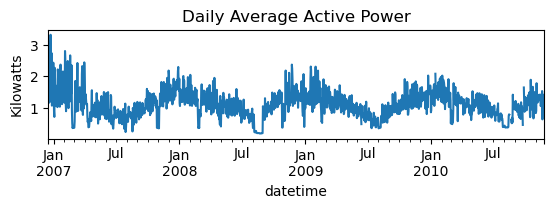

In [23]:
plt.subplot(3, 1, 1)
daily['Global_active_power'].plot(title='Daily Average Active Power')
plt.ylabel('Kilowatts')

Text(0, 0.5, 'Kilowatts')

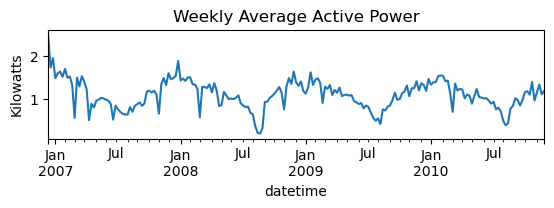

In [24]:
plt.subplot(3, 1, 2)
weekly['Global_active_power'].plot(title='Weekly Average Active Power')
plt.ylabel('Kilowatts')

Text(0, 0.5, 'Kilowatts')

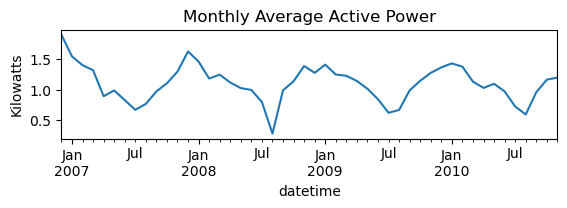

In [25]:
plt.subplot(3, 1, 3)
monthly['Global_active_power'].plot(title='Monthly Average Active Power')
plt.ylabel('Kilowatts')

<Axes: title={'center': 'Average Hourly Power Consumption'}, xlabel='Hour of Day', ylabel='Kilowatts'>

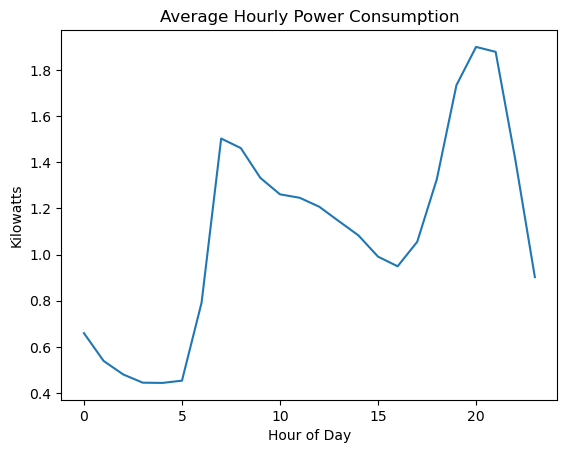

In [27]:
hourly['Global_active_power'].plot(
    title='Average Hourly Power Consumption',
    xlabel='Hour of Day',
    ylabel='Kilowatts')